# Data 601 - Project 2

In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt

#### Dataset Description

Dataset Name: Occupational_Employment_and_Wage_Estimates

Dataset Link: https://catalog.data.gov/dataset/occupational-employment-and-wage-estimates

Source: I have chosen the dataset from data.gov and I have searched for a dataset that can be visualized clearly based on an area and the occupations and wages.

Rows: 6646 

Columns: 12 

Datatypes: Int, Float, String

Legal to Access: Yes

Cost: Free and Opensource

Size of the dataset: 771KB    

In [2]:
# Importing Dataset
df = pd.read_csv('./Occupational_Employment_and_Wage_Estimates.csv')
df.head()

,ID,Year,Area code,Area name,SOC code,Occupational title,Employment,Average wage,25th Percentile,50th Percentile,75th Percentile,Annual wage
0,1.0,2019.0,000053,Washington,13-2011,Accountants & Auditors,32868.0,38.71,27.52,34.60,44.78,80503.0
1,2.0,2019.0,013380,"Bellingham, WA",13-2011,Accountants & Auditors,755.0,32.42,24.49,30.33,37.34,67417.0
2,3.0,2019.0,014740,"Bremerton-Silverdale, WA",13-2011,Accountants & Auditors,403.0,33.37,26.87,31.45,38.56,69416.0
3,4.0,2019.0,028420,"Kennewick-Richland, WA",13-2011,Accountants & Auditors,768.0,36.64,26.94,36.06,45.34,76211.0
4,5.0,2019.0,030300,"Lewiston, ID-WA",13-2011,Accountants & Auditors,145.0,33.52,22.94,28.45,37.49,69717.0


In [3]:
# Fixing NA values 
# Check if there are any null -  NA,N/A or missing values
print("Missing values in the entire dataset \n",df.isnull())


Missing values in the entire dataset 
          ID   Year  Area code  Area name  SOC code  Occupational title  \
0     False  False      False      False     False               False   
1     False  False      False      False     False               False   
2     False  False      False      False     False               False   
3     False  False      False      False     False               False   
4     False  False      False      False     False               False   
5     False  False      False      False     False               False   
6     False  False      False      False     False               False   
7     False  False      False      False     False               False   
8     False  False      False      False     False               False   
9     False  False      False      False     False               False   
10    False  False      False      False     False               False   
11    False  False      False      False     False               False   

In [4]:
print("Count of Missing values in each column \n",df.isnull().sum())

Count of Missing values in each column 
 ID                      1
Year                    1
Area code               0
Area name               1
SOC code                1
Occupational title      1
Employment            621
Average wage          508
25th Percentile       528
50th Percentile       564
75th Percentile       591
Annual wage           101
dtype: int64


# Data Cleaning

In [5]:
# Filling NA values using pandas fillna method

df['ID'] = df['ID'].fillna(method="ffill")
df['Year'] = df['Year'].fillna(method="ffill")
df['Area name'] = df['Area name'].fillna('Unnamed Area')
df['SOC code'] = df['SOC code'].fillna(method="ffill")
df['Occupational title'] = df['Occupational title'].fillna('Unnamed Occupation')

In [6]:
# Filling NA values by calculating the mean of the column

df['Employment'] = df['Employment'].fillna(df['Employment'].mean())
df['Average wage'] = df['Average wage'].fillna(df['Average wage'].mean())
df['25th Percentile'] = df['25th Percentile'].fillna(df['25th Percentile'].mean())
df['50th Percentile'] = df['50th Percentile'].fillna(df['50th Percentile'].mean())
df['75th Percentile'] = df['75th Percentile'].fillna(df['75th Percentile'].mean())
df['Annual wage'] = df['Annual wage'].fillna(df['Annual wage'].mean())



In [7]:
# Checking if there are any missing values after filling them
df.isnull().sum()

ID                    0
Year                  0
Area code             0
Area name             0
SOC code              0
Occupational title    0
Employment            0
Average wage          0
25th Percentile       0
50th Percentile       0
75th Percentile       0
Annual wage           0
dtype: int64

# Data Analysis and Visualization

### Hypothesis 1: Area "X" has the highest average wage and which area stands in the 25th Percentile, 50th Percentile, 75th Percentile

In [8]:
# Grouping the dataset by Area name containg washington

washington_area_df = df.loc[df['Area name'].str.contains('Washington',na=False)]
df_groupby = washington_area_df.groupby('Area name')
df_groupby.first()

,ID,Year,Area code,SOC code,Occupational title,Employment,Average wage,25th Percentile,50th Percentile,75th Percentile,Annual wage
Area name,,,,,,,,,,,
Eastern Washington nonmetropolitan area,16.0,2019.0,530007,13-2011,Accountants & Auditors,647.0,31.42,25.27,29.29,35.93,65350.0
Washington,1.0,2019.0,000053,13-2011,Accountants & Auditors,32868.0,38.71,27.52,34.60,44.78,80503.0
Western Washington nonmetropolitan area,15.0,2019.0,530006,13-2011,Accountants & Auditors,759.0,31.86,24.54,29.55,37.37,66257.0


#### Observation: From the above stats, we can clearly observe that "Washington" area is leading in Average wage, 25th Percentile, 50th Percentile, 75th Percentile.

### Hypothesis 2: Area "X" have the highest number of employees when compared to others.

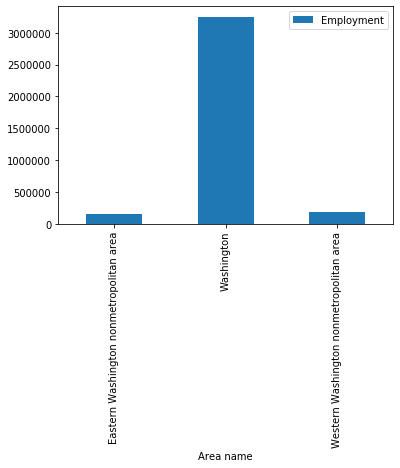

In [9]:
#Plotting Area Name vs Employment
# It is clear from the data and the visualization that the max employment happened in washingtion
washington_area_df.groupby('Area name')['Employment'].sum().plot(legend=True,kind="bar")

#### Observation: "Washington" area has the highest Employment when compared to other areas.

### Hypothesis 3: Area "X" has the highest Annual wage when compared to other area in Washington.

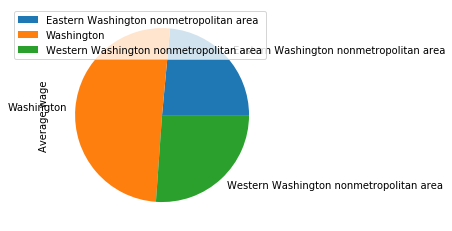

In [10]:
# Plotting the data Area name vs Average wage
# It is clear from the data and the visualization that washingtion has the highest average wage

washington_area_df.groupby('Area name')['Average wage'].sum().plot(legend=True,kind="pie")

#### Obsesrvation: "Washington" area has the highest Annual wage when compared to other areas

### Hypothesis 4: Area code "X" has the highest Average wage when compared to other area codes in Washington.

In [11]:
# Group the data based on Area Codes in washington
area_code_group_by = washington_area_df.groupby('Area code')
area_code_group_by.first()

,ID,Year,Area name,SOC code,Occupational title,Employment,Average wage,25th Percentile,50th Percentile,75th Percentile,Annual wage
Area code,,,,,,,,,,,
000053,1.0,2019.0,Washington,13-2011,Accountants & Auditors,32868.0,38.71,27.52,34.60,44.78,80503.0
530006,15.0,2019.0,Western Washington nonmetropolitan area,13-2011,Accountants & Auditors,759.0,31.86,24.54,29.55,37.37,66257.0
530007,16.0,2019.0,Eastern Washington nonmetropolitan area,13-2011,Accountants & Auditors,647.0,31.42,25.27,29.29,35.93,65350.0


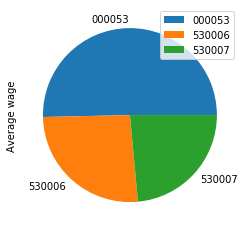

In [12]:
#Plotting Area code vs average wage

# As we can see from the visualization and the data, Area code 000053 has the highest average wage 
washington_area_df.groupby('Area code')['Average wage'].sum().plot(legend=True,kind="pie")


#### Observation: Area code "000053" has the highest average wage when compared to other area codes in "Washington" 

### Hypothesis 5: Occupation Title "X" has the highest employment rate when compared to other occupations in Washington.

In [13]:
#Group the data byoccupation
occupation = df.groupby('Occupational title')
occupation.first()

,ID,Year,Area code,Area name,SOC code,Employment,Average wage,25th Percentile,50th Percentile,75th Percentile,Annual wage
Occupational title,,,,,,,,,,,
Accountants & Auditors,1.0,2019.0,000053,Washington,13-2011,32868.000000,38.710000,27.520000,34.600000,44.780000,80503.000000
Actors,17.0,2019.0,000053,Washington,27-2011,691.000000,29.380743,22.616862,27.215633,33.045742,61746.603056
Actuaries,20.0,2019.0,000053,Washington,15-2011,365.000000,64.240000,43.610000,60.950000,79.290000,133615.000000
Adhesive Bonding Machine Operators & Tenders,23.0,2019.0,000053,Washington,51-9191,578.000000,23.450000,16.270000,21.010000,30.110000,48778.000000
"Admin Law Judges, Adjudicators & Hearing Officers",28.0,2019.0,000053,Washington,23-1021,400.000000,53.220000,43.290000,49.790000,57.090000,110700.000000
Administrative Services Managers,32.0,2019.0,000053,Washington,11-3011,5027.000000,60.070000,43.090000,54.710000,70.220000,124948.000000
"Adult Literacy, Remedial Ed, GED Teachers/Instructors",48.0,2019.0,000053,Washington,25-3011,2355.000000,25.880000,22.010000,25.720000,29.930000,53836.000000
Advertising & Promotions Managers,59.0,2019.0,000053,Washington,11-2011,447.000000,72.790000,54.590000,69.900000,83.210000,151409.000000
Advertising Sales Agents,63.0,2019.0,000053,Washington,41-3011,3240.000000,31.640000,19.320000,25.600000,37.900000,65794.000000


In [14]:
# Finding maximum employment value based on Occupation
result = df.groupby('Occupational title')['Employment']
max_employment_value = result.max().max()
max_employment_value


103224.0

In [15]:
for title,group in result:
  if group.max() == max_employment_value:
    print(title + " : "+str(max_employment_value))

# From the data, the "Retail Salespersons" occupation has the highest employment

Retail Salespersons : 103224.0


#### Observation: "Retail Salespersons" occupation has the highest number of employment when compared to other occuaptions.

Text(0, 0.5, 'Max Employment')

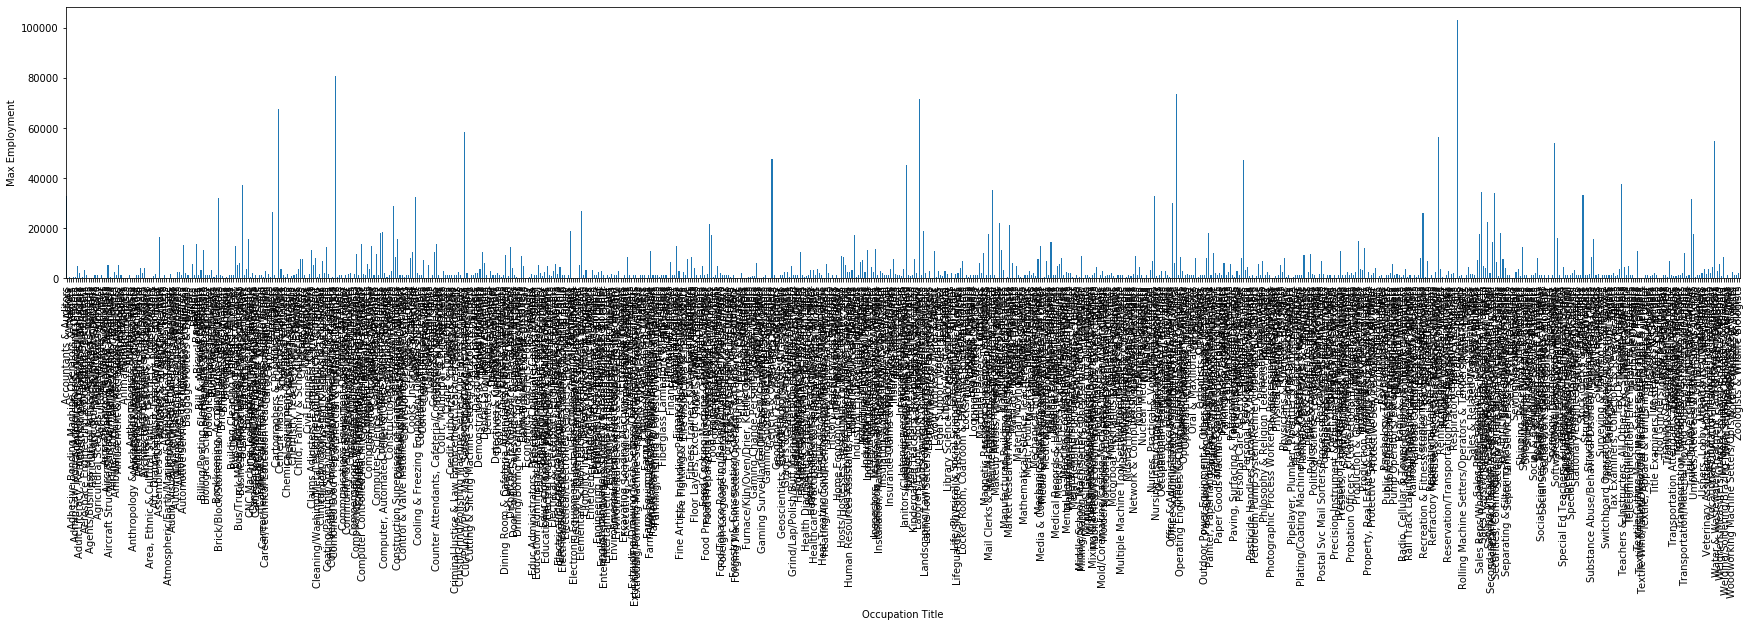

In [16]:
ax = result.max().plot(figsize = (30,5),kind="bar")
ax.set_xlabel("Occupation Title")
ax.set_ylabel("Max Employment")